<a href="https://colab.research.google.com/github/AlyW8/Data-Science/blob/main/AlysWangU4Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

You need to submit a .ipynb file with the first four letters of one first name, the first four letters of one last name, and U3proj.

Ex.

A student named Avy Aguacate Avocado Palta will submit a file named "Avy_AvocU3proj.ipynb", since she normally just goes by Avy, and, when pressed, reports Avocado as her last name. The " _ " after "Avy" serves as the fourth "letter" in her first name.

Ex2.

Army Armadillo will submit a file named "ArmyArmaU2proj.ipynb"

# Unit 4 Project: Using Hierarchies to Account for Dependence Between Groups

**Task**:

Two parts:

1. Propose a data set that's compatible with a hierarchical model structure built with pymc, and that potentially has some dependence between subgroups within the data set. I must approve your submission before you move on to part 2.

2. Create, analyze, and present a model using pymc within the colab environment, on a data set of your choice, with the following restrictions
- You must have at least one piror and at least one hyperprior.
- Your model must have at least one seperate prior for each subgroup of the data set, and a at least one shared hyperior for all the groups.
- Any student may use the following data set: [basketball2324](https://github.com/thedarredondo/data-science-fundamentals/blob/main/Data/basketball2324.csv). I recommend trying to model TRB (total rebounds) by player position (pos). Also, I recommend pandas query function to splice and clean the data.



Guidlines:

- You are allowed to copy and paste any code from the notes, including my answer key (AK), without any reference or citations. Same goes for the course textbook, BAP3.

- This is an individual project. It is fine if you model the same process as a peer, but your raw data **must** be substantially different. "Substantially different" means that I, your instructor, arbitrarily think your data sets are different enough. There is an execption to this rule for unit 4: [NBA player data from the 2023-2024 season](https://github.com/thedarredondo/data-science-fundamentals/blob/main/Data/basketball2324.csv). Other seasons are allowed as well.

- Do not look at other student's code/jupyter notebooks. Copying, or copying and pasting, other students code will result in a failing grade. Also, I will tell all the other teachers I know that you cheated.

- If you want to know what another student did, ask them--any verbal communication about a project is allowed and encouraged. If you want to see a graphic they made, ask them to sketch a picture of it for you by hand.

- Any handwritten communication is also allowed and encouraged, so long as all parties are in the same physical location together. Example: you may sketch out a piece of code while verbally explaining to someone what you did. Do NOT: hand write the code for your entire project, take a picture, and send it to everyone in the course.

- If you use someone's code from outside this course (like from the internet, an AI, or your parent), you must ask me if it is ok, and you must cite them in your work. I don't care all they did was to click your space bar one more time: you tell me, and you cite their contribution. You don't need to tell me about or cite verbal or handwritten communication though.

- You may use a more complicated model--like something from further along in the course--IF I give you permission.

- If you are unsure whether or not something is ok or allowed: ASK BEFORE YOU DO IT.

Faliure to adhere to these guidlines will result in a failing grade.

Tips:

- Try to pick something that you care about, have knowledge of, experience with, or that you find interesting/cool.

- Gather data *before* picking a likelihood.

-  Use your best idea now; maybe you can look at the context you used in the previous project, and gather different data from it.

- All students are allowed to use this data set: [NBA player data from the 2023-2024 season](https://github.com/thedarredondo/data-science-fundamentals/blob/main/Data/basketball2324.csv). Why? This is could lead to similar analysis as the soccer data analysis--basically, I think this data set will work well with the models we ran in class. Let me know if you have questions about downloading and cleaning the data.

- Comment heavily, and explain your steps and thought process with text blocks. This is not only requried, it'll also help you understand what you're doing and what you want to do.

- Want an example? The Unit4NotesAK *is* your example! You are expected to be somewhere between a half and three-quarters as detailed--but more is always welcome.

- I didn't totally understand the chemical shift context--which means you don't have to totally understand the context of your data either! You should try to learn as you go, though.


# My Project Title



---






In [2]:
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
import arviz as az
import graphviz as gv
import pymc as pm

# Causal Diagram

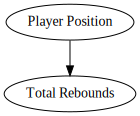

In [3]:
dag_nba = gv.Digraph(comment='od_dag')

dag_nba.node('P','Player Position')
dag_nba.node('R','Total Rebounds')

dag_nba.edges(['PR'])
dag_nba


# Non-Hierarchical Models

In [4]:
url_nba = 'https://raw.githubusercontent.com/thedarredondo/data-science-fundamentals/refs/heads/main/Data/basketball2324.csv'
nba_data = pd.read_csv(url_nba,dtype={'Pos':'category'}) #Turns the position column into a categorical variable

nba_data = nba_data.dropna()
nba_data

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Player-additional
0,Precious Achiuwa,PF-C,24,TOT,74,18,1624,235,469,0.501,...,191,296,487,97,46,68,83,143,565,achiupr01
1,Bam Adebayo,C,26,MIA,71,71,2416,530,1017,0.521,...,159,578,737,278,81,66,162,159,1367,adebaba01
2,Ochai Agbaji,SG,23,TOT,78,28,1641,178,433,0.411,...,74,142,216,83,47,44,64,117,455,agbajoc01
3,Santi Aldama,PF,23,MEM,61,35,1618,247,568,0.435,...,72,280,352,138,43,54,69,89,654,aldamsa01
4,Nickeil Alexander-Walker,SG,25,MIN,82,20,1921,236,538,0.439,...,35,132,167,204,64,42,76,143,655,alexani01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,Delon Wright,PG,31,TOT,47,1,742,74,188,0.394,...,19,67,86,119,54,11,14,32,210,wrighde01
567,Thaddeus Young,PF,35,TOT,33,6,439,65,108,0.602,...,46,57,103,57,23,5,15,49,137,youngth01
568,Trae Young,PG,25,ATL,54,54,1942,433,1008,0.430,...,23,126,149,583,72,11,235,109,1389,youngtr01
569,Omer Yurtseven,C,25,UTA,48,12,545,99,184,0.538,...,72,136,208,29,8,18,37,52,222,yurtsom01


In [5]:
pos_idx = nba_data.Pos.cat.codes.values

#an array of the four strings that represent position
pos_codes = nba_data.Pos.cat.categories

#puts coords in a dict, so pymc can read them
nba_coords = {"pos": pos_codes}

<Axes: xlabel='TRB', ylabel='Pos'>

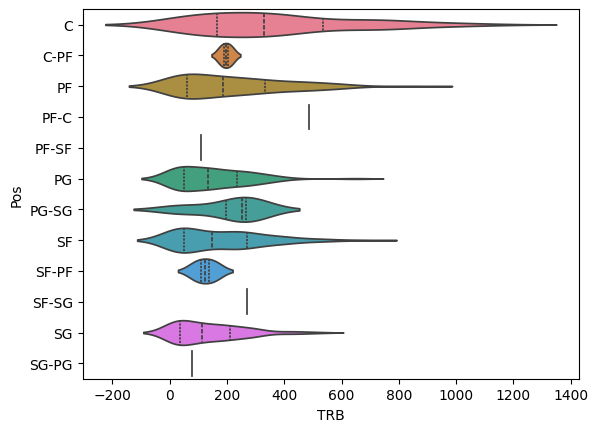

In [6]:
sns.violinplot(nba_data, x='TRB', y='Pos', inner='quart',hue='Pos')


In [ ]:
#making non-hierarchical model 1
with pm.Model(coords = nba_coords) as nba_nh_model:

    μ = pm.Normal('μ', mu = 200, sigma = 100, dims = "pos")

    σ = pm.HalfNormal('σ', sigma=300,
                      dims="pos")

    y = pm.Normal('nh',
                    mu = μ[pos_idx],
                    sigma = σ[pos_idx],
                    observed = nba_data.TRB.values)

    idata_nba_nh = pm.sample(target_accept = 0.95)

In [ ]:
#posterior predictive check- nh 1
pm.sample_posterior_predictive(idata_nba_nh, model=nba_nh_model, extend_inferencedata=True)

<Axes: xlabel='nh'>

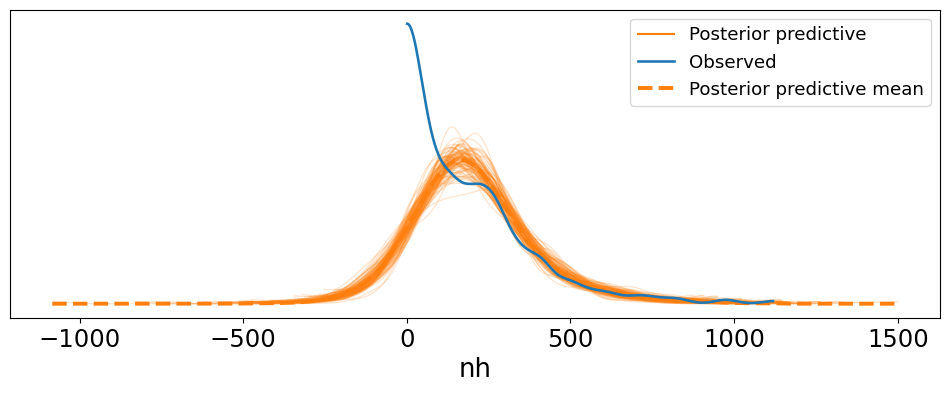

In [9]:
az.plot_ppc(idata_nba_nh, num_pp_samples=100, figsize=(12, 4), colors=["C1", "C0", "C1"])

The normal model is a bad model, which I probably should've realized before I even started it because there can't be negative total rebounds. I'll try the Half Normal distribution next and see if it looks ok.

---




In [ ]:
#making non-hierarchical model half normal
with pm.Model(coords = nba_coords) as nba_nh2_model:

    #μ = pm.Normal('μ', mu = 200, sigma = 100, dims = "pos")

    σ = pm.HalfNormal('σ', sigma=300,
                      dims="pos")

    y = pm.HalfNormal('nh',
                    #mu = μ[pos_idx],
                    sigma = σ[pos_idx],
                    observed = nba_data.TRB.values)

    idata_nba_nh2 = pm.sample(target_accept = 0.95)

In [ ]:
#posterior predictive check- nh, hn
pm.sample_posterior_predictive(idata_nba_nh2, model=nba_nh2_model, extend_inferencedata=True)

<Axes: xlabel='nh'>

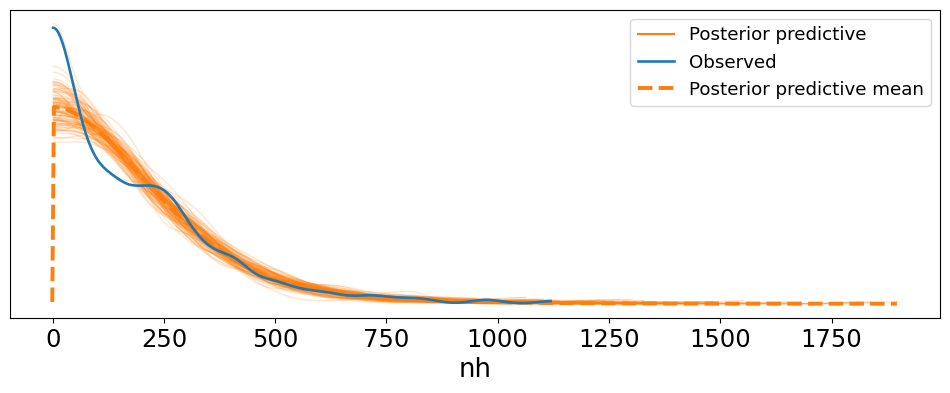

In [12]:
az.plot_ppc(idata_nba_nh2, num_pp_samples=100, figsize=(12, 4), colors=["C1", "C0", "C1"])

The Half Normal looks a lot better, but it still doesn't predict total rebounds at values less than 250 very accurately.


# Hierarchical Models

In [ ]:
with pm.Model(coords = nba_coords) as nba_h_model:
 # μ_mu = pm.Normal('μ_mu', mu = 300, sigma = 200)
  μ_sd = pm.HalfNormal('μ_sd', sigma=200)

  #μ = pm.Normal('μ', mu = μ_mu, sigma = μ_sd, dims = "pos")
  σ = pm.HalfNormal('σ', sigma = μ_sd, dims = "pos")

  y=pm.HalfNormal('h', sigma = σ[pos_idx], observed = nba_data.TRB.values)

  idata_nba_h = pm.sample(target_accept = .95)



In [ ]:
#posterior predictive check- h
pm.sample_posterior_predictive(idata_nba_h, model=nba_h_model, extend_inferencedata=True)


<Axes: xlabel='h'>

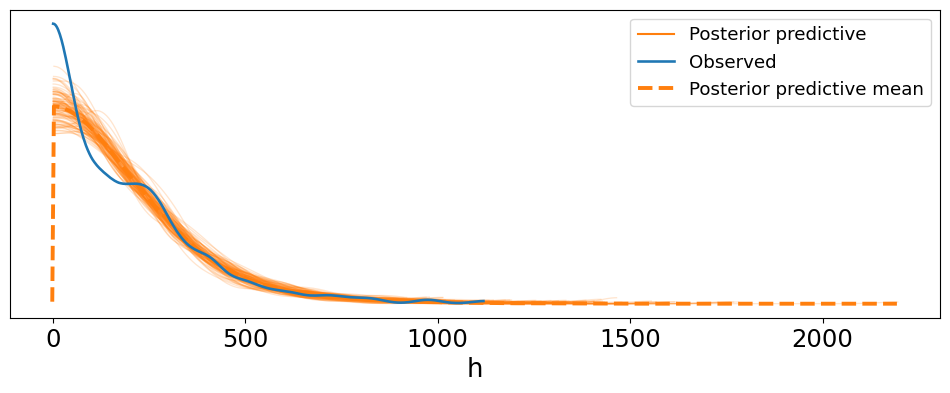

In [15]:
az.plot_ppc(idata_nba_h, num_pp_samples=100, figsize=(12, 4), colors=["C1", "C0", "C1"])

# Model Visualisations, assuming that's next???


array([[<Axes: title={'center': 'μ'}>, <Axes: title={'center': 'μ'}>],
       [<Axes: title={'center': 'σ'}>, <Axes: title={'center': 'σ'}>]],
      dtype=object)

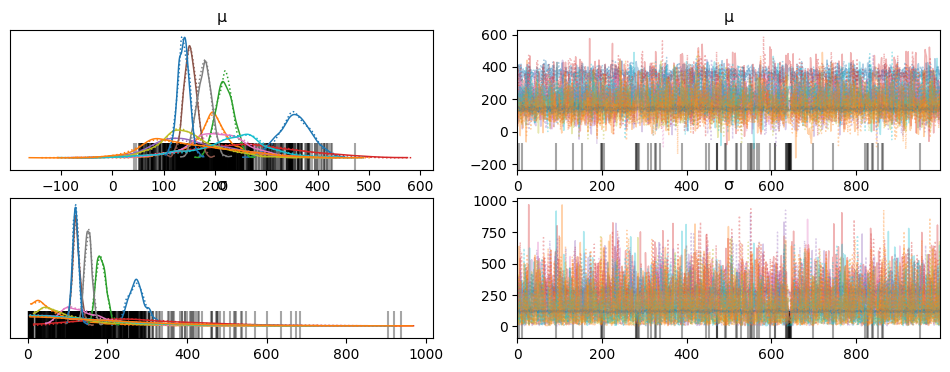

In [16]:
# non-hierarchical 1 (normal)
az.plot_trace(idata_nba_nh)

In [17]:
az.rhat(idata_nba_nh)

<xarray.Dataset> Size: 432B
Dimensions:  (pos: 12)
Coordinates:
  * pos      (pos) <U5 240B 'C' 'C-PF' 'PF' 'PF-C' ... 'SF-SG' 'SG' 'SG-PG'
Data variables:
    μ        (pos) float64 96B 1.0 1.007 1.0 1.001 ... 0.9996 1.001 1.001 1.001
    σ        (pos) float64 96B 1.001 0.9999 1.0 1.004 ... 1.001 1.001 1.0 1.005

array([<Axes: >], dtype=object)

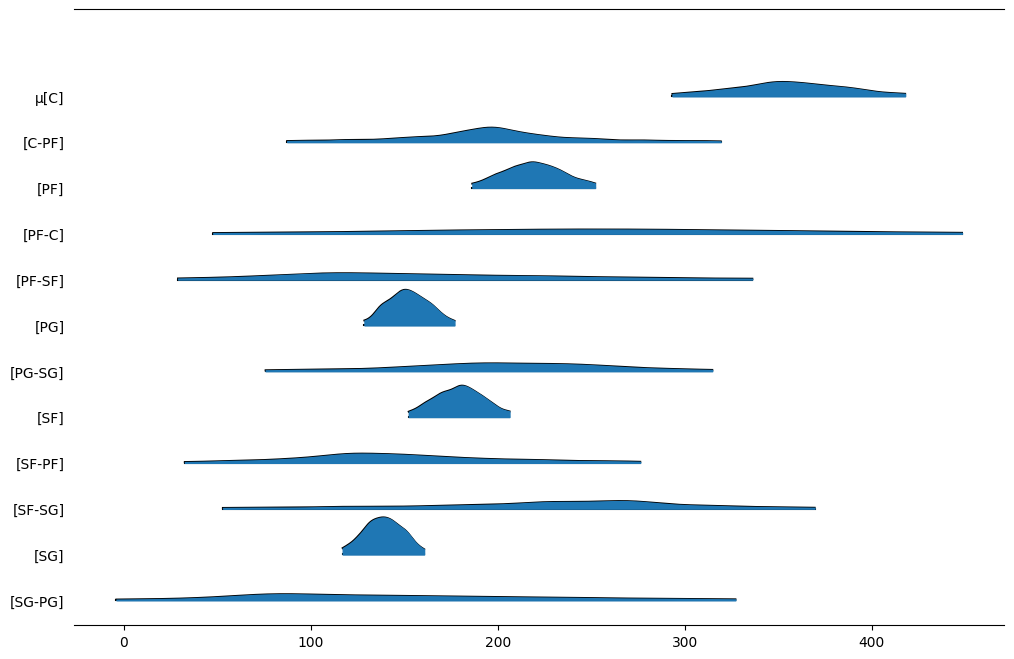

In [18]:
az.plot_forest([idata_nba_nh], var_names=['μ'], combined=True, figsize=(12, 8), kind = 'ridgeplot', hdi_prob=0.95)


array([[<Axes: title={'center': 'σ'}>, <Axes: title={'center': 'σ'}>]],
      dtype=object)

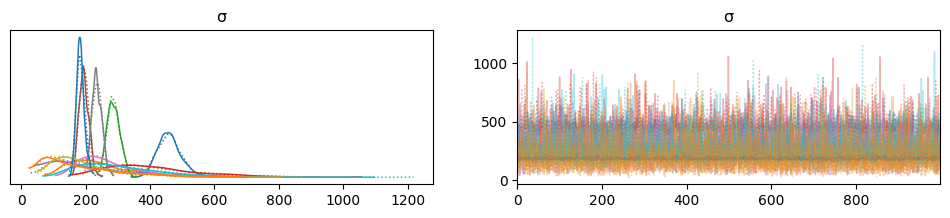

In [19]:
#non-hierarchical 2 (half normal)
az.plot_trace(idata_nba_nh2)

In [20]:
az.rhat(idata_nba_nh2)

<xarray.Dataset> Size: 336B
Dimensions:  (pos: 12)
Coordinates:
  * pos      (pos) <U5 240B 'C' 'C-PF' 'PF' 'PF-C' ... 'SF-SG' 'SG' 'SG-PG'
Data variables:
    σ        (pos) float64 96B 1.0 0.9993 1.001 0.9994 ... 1.0 1.005 1.003

array([<Axes: >], dtype=object)

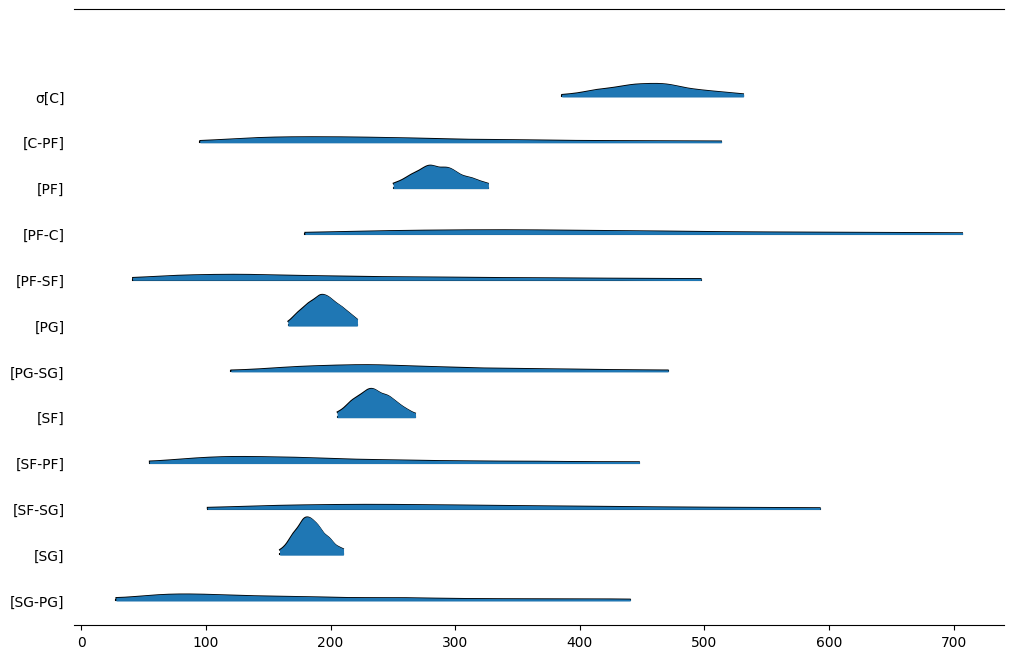

In [21]:
az.plot_forest([idata_nba_nh2], var_names=['σ'], combined=True, figsize=(12, 8), kind = 'ridgeplot', hdi_prob=0.95)


array([[<Axes: title={'center': 'μ_sd'}>,
        <Axes: title={'center': 'μ_sd'}>],
       [<Axes: title={'center': 'σ'}>, <Axes: title={'center': 'σ'}>]],
      dtype=object)

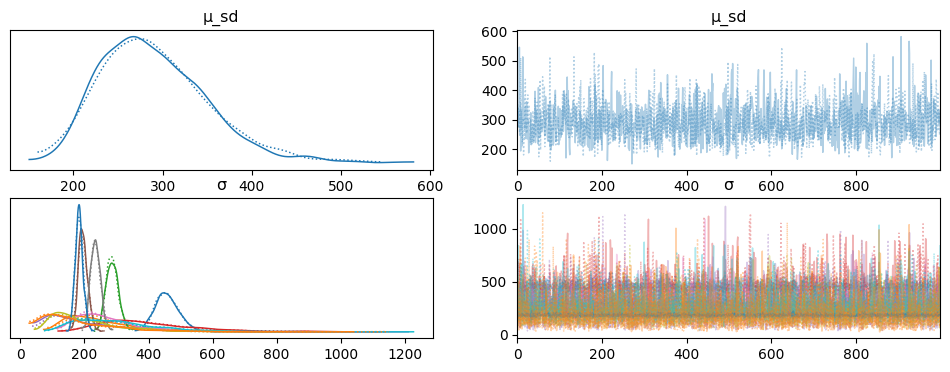

In [22]:
# hierarchical
az.plot_trace(idata_nba_h)

In [23]:
az.rhat(idata_nba_h)

<xarray.Dataset> Size: 344B
Dimensions:  (pos: 12)
Coordinates:
  * pos      (pos) <U5 240B 'C' 'C-PF' 'PF' 'PF-C' ... 'SF-SG' 'SG' 'SG-PG'
Data variables:
    μ_sd     float64 8B 1.001
    σ        (pos) float64 96B 1.003 1.001 1.001 1.001 ... 1.002 1.0 0.9995 1.0

array([<Axes: >], dtype=object)

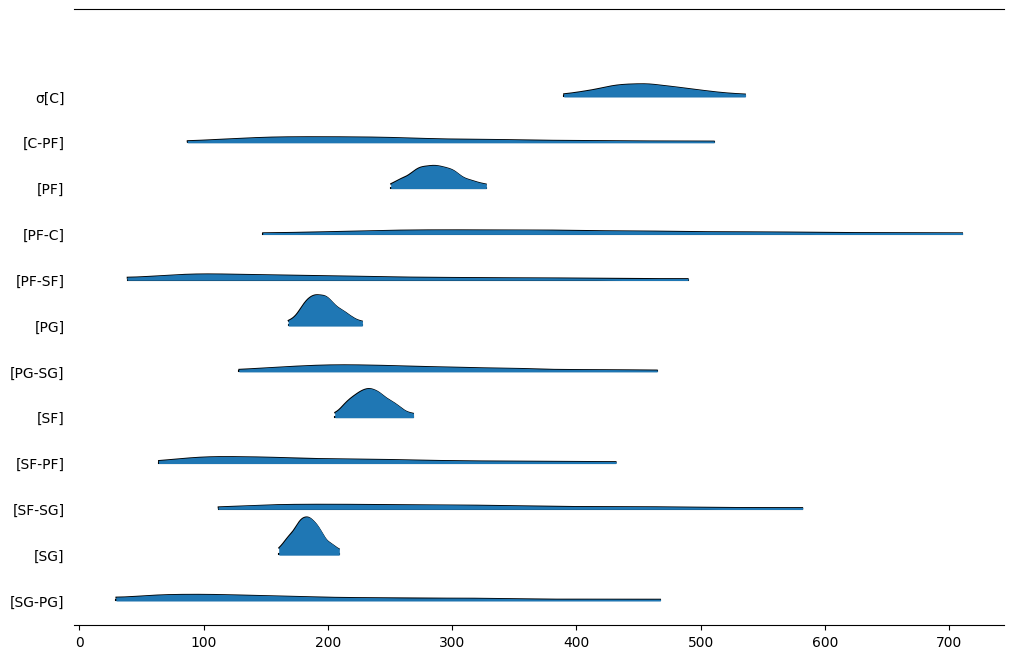

In [24]:
az.plot_forest([idata_nba_h], var_names=['σ'], combined=True, figsize=(12, 8), kind = 'ridgeplot', hdi_prob=0.95)


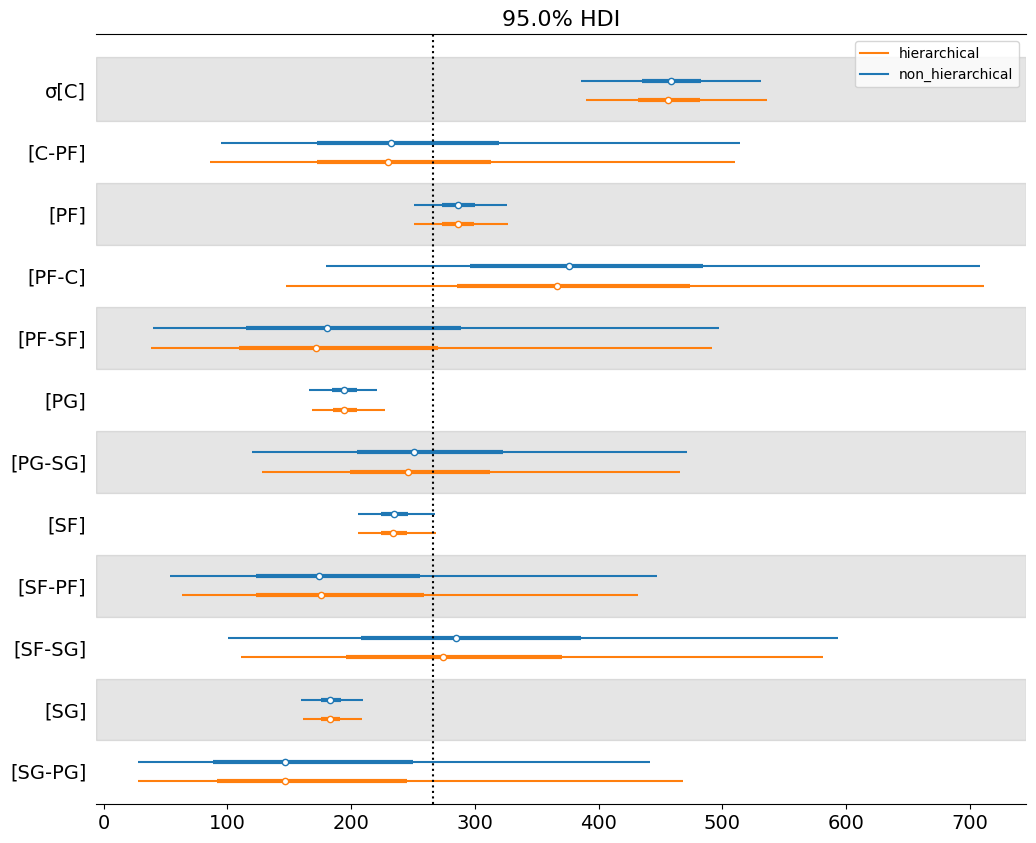

In [32]:
# plot of hierarchical and non-hierarchical (the 2nd one)

axes = az.plot_forest([idata_nba_nh2, idata_nba_h], kind="forestplot",
                      model_names=['non_hierarchical', 'hierarchical'],
                      var_names='σ', combined=True, figsize=(12, 10),hdi_prob=0.95)

#plots overall mean of the hierarchical model; do not confuse with 0
y_lims = axes[0].get_ylim()
axes[0].vlines(idata_nba_h.posterior['σ'].mean(), *y_lims, color="k", ls=":");

# Conclusion


There seems to be no visible difference between the half normal non-hierarchical model (henceforth to be known as "the" non-hierarchical model bc I'm lazy and like that one better) and the hierarchical model. The R hat values on the hierarchical model are better than the ones on the non-hierarchical though, so I guess the hierarchical is still the better model of total rebounds of NBA players.

I admittedly know very little about basketball, so I can't provide as much context as I would like. I suppose the total rebounds of a player could be dependent on the general flow of the game and their teammates, or by their coaches' training, which could make a hierarchical model better.

The models also seem to only be able to properly predit the total rebounds of positions C, PG, PF, SF, and SG. The other positions all have very high variance in the forest plots.